# 통계 200문제

```
웹 광고 클릭 1초를 위해 시간 내어주셔서 감사합니다.
```

### 하단부에 adp 기출문제 리스트 있습니다!

## 통계적추론

In [1]:
###print

## 정규 모집단에서의 추론

In [ ]:
###

## 두 모집단의 비교

In [2]:
###

## 분산분석

In [3]:
###

## 범주형 자료분석

In [4]:
###

## 확률 분포

In [5]:
###

## adp 통계문제 정리

```{admonition} 22회
**금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오. (유의확률 0.05)**     
- 1 연구가설과 귀무가설 작성
- 2 양측 검정 시행
- 3 검정통계량, 가설채택
```

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

content
0   97.995295
1  101.478315
2  102.284913
3   98.993634
4  104.635232

In [25]:
# 파이썬에서는 단일 표본 분산검정 or 단일 표본 카이검정 패키지가 없어서 커스텀해서 사용 / https://blog.naver.com/breezehome50/222334155742
from scipy import stats

def chi_var_test(x, var0, alternative='two-sided'):
    lenth = len(x)
    chi_stat = (lenth-1) * np.var(x, ddof=1) / var0
    
    temp = stats.chi2.cdf(chi_stat, lenth-1)
    if alternative == 'two-sided':
        pval = 2*(1-temp) if temp > 0.5 else 2*temp
    elif alternative == 'greater':
        pval = 1 - temp
    elif alternative == 'less':
        pval = temp
    else:
        print("ERROR")
        
    return chi_stat, pval


# 1. 귀무가설 : 분산은 1.3이다. / 연구가설 : 분산은 1.3이 아니다

# 2. 양측 검정 시행
chi_stat, p_val = chi_var_test(df['content'], var0=1.3, alternative='two-sided')
print('p-value ',p_val)
print('statics ',chi_stat)

# 3. 검정통계량
# p-value는 4.2e-8로 유의수준 0.05수준에서 귀무가설을 기각하고 연구가설을 채택한다.

p-value  4.2726668647574684e-08
statics  328.2922980307293


```{admonition} 22회
**Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)**
- 1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기
- 2 관리도 시각화
```

In [27]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

iot_number  error_case_number
0           1                4.5
1           2                2.5
2           3                2.0
3           4                3.0
4           5                0.5

cl :  0.42625 ucl :  1.6698072600772789 lcl :  -0.8173072600772788


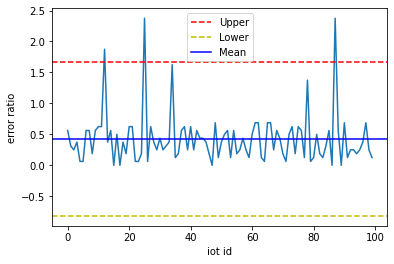

In [30]:
# 1. 3시그마를 기준으로 상한 하한선을 선정

df['error_case_number'] = df['error_case_number']/200*100

mean =df['error_case_number'].mean()
ucl = mean + df['error_case_number'].std()*3
lcl = mean - df['error_case_number'].std()*3

print('cl : ',mean,'ucl : ',ucl,'lcl : ',lcl)


# 2. 관리도 시각화

import matplotlib.pyplot as plt
plt.plot(df['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--',label='Upper')
plt.axhline(y=lcl, color='y', linestyle='--',label='Lower')
plt.axhline(y=mean, color='b',label="Mean")
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()

```{admonition} 23회
**공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오**     
- 1. 귀무가설 연구가설 세우기
- 2. 유효한 데이터의 숫자는?
- 3. 검정통계량 및 연구 가설 채택 여부를 작성하라
```

In [33]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head()

name  life span
0  sample1      10000
1  sample2       9000
2  sample3       9500
3  sample4      10000
4  sample5      10000

In [36]:
# 1. 귀무가설 : 데이터의 중위수는 1만 시간이다 / 연구가설 : 데이터의 중위수는 1만 시간이 아니다
# 2. 유효한 데이터 숫자
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 : ',df[df['life span']==10000].shape[0])

df_fillter = df[df['life span'] != 10000]

# 3. 검텅통계량 및 연구 가설 채택 여부 작성
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span']-10000)
print('검정통계량은 ',static,'이다. pvalue는 ',pvalue,'로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. ')

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 :  4
검정통계량은  8.5 이다. pvalue는  0.1953125 로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. 


```{admonition} 23회
**아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라**     
- 1. 귀무가설 연구가설 세우기
- 2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
- 3. 검정통계량 및 연구 가설 채택 여부를 작성하라
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/23/problem4.png?raw=true)

In [38]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
# 1. 귀무가설 : 학과와 성적은 관련이 없다 (독립이다) / 연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)

# 2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
from scipy.stats import chi2_contingency,fisher_exact
chi2 , p ,dof, expected = chi2_contingency(df)
print(expected)

# 3. 검정 통계량 및 연구 가설 채택 여부를 작성하라 
print(p)

# 카이 제곱 검정시 p-value는 0.00018로 귀무가설을 기각한다. 학과와 성적은 관련이 있다.
# 만약 5보다 작은 셀이 20%가 넘어 간다면(75%) 피셔의 정확검정을 사용 해야한다. #print(fisher_exact(df))

[[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]
0.00018822647762421383


```{admonition} 24회
**광고횟수와 광고비에 따른 매출액의 데이터이다**     
- 1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- 2 회귀식이 유의한지 판단
```

In [60]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

광고횟수 광고비  매출액
0     2  낮음   15
1     3  낮음   16
2     4  낮음   17
3     4  높음   18
4     5  높음   20

In [61]:
# 1. 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
df['광고비'] = df['광고비'].map({'낮음':0,'높음':1})
import statsmodels.api as sm

X = sm.add_constant(df[['광고횟수', '광고비']])
model = sm.OLS(df['매출액'], X).fit()
for variable, p_value in zip(X.columns, model.pvalues):
    print(f'{variable}: {p_value}')
    
# 회귀 계수의 pvalue값을 추출 했을 때 광고비만 0.05를 넘는다. 이는 광고비만 유의하지 않다고 볼 수 있다.

# 2. 회귀식이 유의 한지 판단

# 모델요약은 아래와 같다. 회귀식의 F static의 p value는 9.96e-08로 해당 회귀식은 유의하다고 볼 수 있다.
print(model.summary())

const: 2.0119142034490317e-08
광고횟수: 4.935242822849241e-08
광고비: 0.3579628773149427
                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           9.96e-08
Time:                        17:04:57   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


```{admonition} 24회
**각 공장별로 12개의 제품을 추출하여 구한 정보가 A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65**
- 1 귀무가설과 대립가설을 세워라
- 2 두 평균이 차이가 있는지 검정하라
```

In [63]:
import numpy as np
from scipy import stats

# A생산라인의 평균, 표준편차
mean_A = 5.7
std_A = 0.03

# B생산라인의 평균, 표준편차
mean_B = 5.6
std_B = 0.04

# 데이터의 갯수
n = 12

# 검정 결과
z_score = (mean_A - mean_B) / np.sqrt(std_A**2/n + std_B**2/n)
p_value = stats.norm.sf(z_score)

# 유의수준 5% 이하이면 귀무가설(두 평균의 차이가 없음) 기각, 차이가 있음 결론
alpha = 0.05
if p_value <= alpha:
    print(f"pvalue는 {p_value}로 A생산라인과 B생산라인의 평균에 차이가 존재합니다.")
else:
    print(f"pvalue는 {p_value}로 A생산라인과 B생산라인의 평균에 차이가 없습니다.")


pvalue는 2.1310957989212665e-12로 A생산라인과 B생산라인의 평균에 차이가 존재합니다.


```{admonition} 24회
**바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라**
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/24/problem4.png?raw=true)

In [73]:
data = pd.DataFrame({'양성(실제)':[370,10],'음성(실제)':[10,690]},index = ['양성(예측)','음성(예측)'])
data

양성(실제)  음성(실제)
양성(예측)     370      10
음성(예측)      10     690

```{admonition} 24회
**주어진 데이터에서 신뢰구간을 구하려한다**     
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]       
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]     

- 1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라
- 2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라
```

In [11]:
###

```{admonition} 25회
**서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?**
```

In [12]:
###

```{admonition} 25회
**연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?**
```

In [13]:
###

```{admonition} 25회
**남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오**
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/25/problem3_3.png?raw=true)

In [14]:
###

```{admonition} 25회
**표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정**
```

In [15]:
###

```{admonition} 25회
**임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다**     
- 1 귀무가설과 연구가설을 제시하시오
- 2 검정 후 귀무가설 기각 여부 제시

```

In [16]:
###

```{admonition} 25회
**공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다**     
- 1 귀무가설과 연구가설을 제시하시오
- 2 검정 후 귀무가설 기각 여부 제시

```

In [17]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

출하 소요시간 공장명  공장별 출하 소요시간 순위
0       71   Z              11
1       75   X              14
2       71   X              12
3       53   Z               1
4       50   X               1

```{admonition} 25회
**1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오**     

```

![img](https://github.com/Datamanim/datarepo/blob/main/adp/25/problem6.png?raw=true)

In [29]:
###

```{admonition} 26회
**통계**     
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

```

In [30]:
###

```{admonition} 26회
**아래 그래프는 1월부터 9월까지의 은의 가격이다**     
- 1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라
- 2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림
```

![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png)

In [31]:
###

```{admonition} 26회
**아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라**     
- 1 연구가설과 귀무가설을 설정하라
- 2 검정통계량 구하고 결론을 내라
```

![img](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true)

In [43]:
###

```{admonition} 26회
**A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.**     
- 1 연구가설과 귀무가설을 설정하라
- 2 통계량을 구하고, 연구가설 채택여부를 기술하라.
- 3 2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라
```

In [32]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()

gender  pressure
0   male     106.8
1   male     100.8
2   male      84.5
3   male     104.2
4   male     107.0

```{admonition} 26회
**height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라**     
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.        
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다. 
- 1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
    - 베이지안 회귀
    - 시드넘버 1234로 지정
    - 1000번의 burn-in 이후 10,000의 MCMC를 수행
    - 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.
    
- 2 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라
```

In [33]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

height  weight  waistline
0  174.396  72.102    79.3787
1  179.656  81.255    80.6649
2  175.079  76.207    80.3166
3  180.804  81.354    80.8794
4  177.448  78.768    80.3499

```{admonition} 5번
**2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)**     
```

```{admonition} 27회
**2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)**     
```

In [34]:
###

```{admonition} 27회
**12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?**     
```

In [35]:
###

```{admonition} 27회
**강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)**
- 1 귀무가설과 대립가설을 세우시오
- 2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.
```

In [36]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head()

River    up  down
0     A  57.1  45.7
1     B  51.6  37.2
2     C  53.9  53.3
3     D  59.0  54.3
4     E  57.5  46.3

```{admonition} 27회
**user_counts를 종속변수로 하는 데이터이다**
- 1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
- 2 1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오 
```

In [37]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226
3     3.400000  2.675       0.156989         5829
4     8.900000  3.950       7.988462         7589

```{admonition} 27회
**지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)**
- 1 귀무가설과 대립가설 설정하라
- 2 통계량을 구하고, 대립가설 채택여부를 기술하라
```

In [38]:
###